In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
A = np.matrix([[1/ (i + j + 1) for j in range(5)] for i in range(5)])
x_0 = np.matrix([1, 2, 3, 4, 5]).T

In [5]:
def f(x):
    return x.T @ A @ x

def nabla_f(x):
    return x.T @ (A + A.T)

In [6]:
def gd_backtracking_step(f, nabla_f, x, S_0, beta, gamma):
    s = -nabla_f(x).T * 1e-3

    i = 1
    while f(x) - f(x + S_0 * beta ** i * s) < -gamma * S_0 * beta ** i * nabla_f(x) @ s:
        i += 1
        if i > 1000:
            break
    
    return x + s * beta ** i * S_0

In [7]:
x = x_0
data = []
xs = []
for i in range(40000):
    x = gd_backtracking_step(f, nabla_f, x, 1, 0.5, 0.1)
    data.append(np.linalg.norm(nabla_f(x), ord=2))
    xs.append(f(x)[0, 0])

print(min(data))

0.03569677237324367


In [21]:
with open("3-3.dat", "w") as file:
    file.write("||∇f(x)|| f(x)\n")
    file.write("\n".join(map(lambda i: f'{i[0]} {i[1]}', zip(data, xs))))

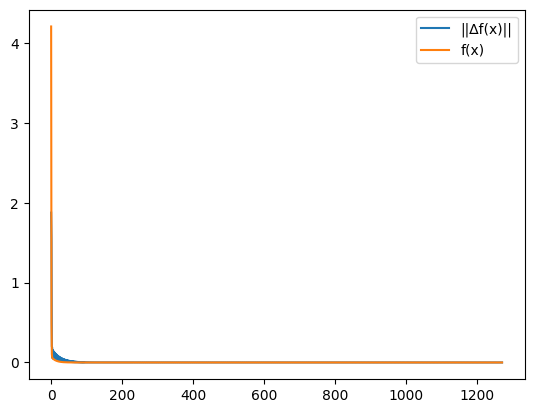

In [22]:
plt.plot(data)
plt.plot(xs)
plt.legend(['||∆f(x)||', 'f(x)'])

In [10]:
def gd_exact_line_search(A, x):
    s = (x.T @ A).T

    sigma = -s.T @ A @ x / (s.T @ A @ s)

    return x + s * sigma

In [20]:
x = x_0
data = []
xs = []
i = 0
# for i in range(200):
while np.linalg.norm(nabla_f(x), ord=2) > 1e-4:
    x = gd_exact_line_search(A, x)
    data.append(np.linalg.norm(nabla_f(x), ord=2))
    xs.append(f(x)[0, 0])
    i += 1

print(min(data))

9.9975852696532e-05
